In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.models import load_model
import opticspy
import random
from random import randrange

Using TensorFlow backend.


In [2]:
parent_dir = ''
# for using on local windows machine

In [ ]:
def plot_mae(start_test=1,stop_test=2,
            parent_dir='',
            savefig=False,custom=False,cust_list=[]): 
    
    #extract min mean absolute errors from recorded history of each test
    mae_vals = []
    if custom == False:
        for i in range(start_test,stop_test+1):
            os.chdir(parent_dir)
            print(os.getcwd())
            history = pd.read_csv('.\\Test_{}\\Training.log'.format(i),delimiter=',',header=0)
            mae_vals.append(np.min(history.loc[:,'val_mean_absolute_error']))
            #print("Adding {} for Test {}".format(np.min(history.loc[0,'val_mean_absolute_error']),i))
        print(mae_vals)

        #plot MAE's for each test
        plt.bar(list(range(start_test,stop_test+1)),mae_vals)
        plt.title('Model MAE Minimums')
        plt.ylabel('Min MAE')
        plt.xlabel('Test Num')
        plt.xticks(np.arange(start_test, stop_test+1, 1))
        if savefig == True:
            plt.savefig('Min_MAE_Test_{}-{}.png'.format(start_test,stop_test), dpi=300, bbox_inches='tight')
        plt.show()
        plt.clf()
    else:
        for i in cust_list:
            os.chdir(parent_dir)
            history = pd.read_csv('.\\Test_{}\\Training.log'.format(i),delimiter=',',header=0)
            mae_vals.append(np.min(history.loc[:,'val_mean_absolute_error']))
            #print("Adding {} for Test {}".format(np.min(history.loc[0,'val_mean_absolute_error']),i))
        print(mae_vals)

        #plot MAE's for each test
        plt.bar(list(map(str,cust_list)),mae_vals)
        plt.title('Model MAE Minimums')
        plt.ylabel('Min MAE')
        plt.xlabel('Test Num')
        if savefig == True:
            plt.savefig('Min_MAE_Cust.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.clf()

def retrieve_graph(test,parent_dir):
    os.chdir(parent_dir + '.\\Test_{}'.format(test))
    to_display = plt.imread('MAE_Plot_Test_{}.png'.format(test))
    plt.imshow(to_display)
    plt.show()
    plt.clf()

def retrieve_comp_plot(test,parent_dir):
    os.chdir(parent_dir + '.\\Test_{}'.format(test))
    to_display = plt.imread('Predicted_Values_Test_{}.png'.format(test))
    plt.imshow(to_display)
    plt.show()
    plt.clf()
    
def retrieve_test_settings(test,parent_dir):
    os.chdir(parent_dir + '.\\Test_{}'.format(test))
    print(pd.read_csv('.\\Test_{}_Settings.csv'.format(test,test),header=0))

In [ ]:
plot_mae(1,15,parent_dir=parent_dir,savefig=True)

In [ ]:
plot_mae(parent_dir=parent_dir,savefig=False,custom=True,cust_list=[3,6,7,11,12])

In [ ]:
for i in [3,6,7,11,12]:
    print('\nMAE GRAPH FOR TEST {}'.format(i))
    retrieve_graph(i,parent_dir=parent_dir)

In [ ]:
# for i in [3,6,7,11,12]:
#     print('\nTEST SETTINGS FOR TEST {}'.format(i))
#     retrieve_test_settings(i,parent_dir=parent_dir)

In [3]:
# Simple scaling normalization
def zernike_gen(batch_size=16,sqr_grid_width=50):
    
    while True:

        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])
        
#         Divide x and y by 49 to normalize between 0 and 1
        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)
        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]
        
#         Divide by 10 to keep numbers near the -1 to 1 range
        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])

        train_input = np.array([np.transpose([x[i], y[i], dx_train[i], dy_train[i]])
                      for i in range(batch_size)])

        yield train_input,train_coeff

In [4]:
def block_gen(min_blk=2,max_blk=10,sqr_grid_width=50):
    x_block_size = randrange(min_blk,max_blk+1) 
    x_block_start = randrange(sqr_grid_width-1-x_block_size) 
    x_block = np.array(range(x_block_start,x_block_start+x_block_size))/float(sqr_grid_width)

    y_block_size = randrange(min_blk,max_blk+1) 
    y_block_start = randrange(sqr_grid_width-1-y_block_size) 
    y_block = np.array(range(y_block_start,y_block_start+y_block_size))/float(sqr_grid_width)
    
    return x_block,y_block

y_mask = lambda y,batch,block: np.isin(y[batch][:,1],block)

x_mask = lambda x,batch,block: np.isin(x[batch][:,0],block)

def zernike_gen_block(batch_size=16,sqr_grid_width=50):
   
    while True:
        
        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])


        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)

        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]

        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])

        train_input = np.array([np.transpose([x[i], y[i], dx_train[i], dy_train[i]])
                            for i in range(batch_size)])

    #     NOTE: every sample in batch has the same block removed with this set up?
    #     Generate random block
        x_block,y_block = block_gen(min_blk=2,max_blk=10,sqr_grid_width=sqr_grid_width)

    #     Remove random block
        for i in range(batch_size):
            train_input[i][(y_mask(train_input,i,y_block)) & (x_mask(train_input,i,x_block))] = 0


        yield train_input,train_coeff

In [5]:
# Create random matrix to add to dx and dy
def add_noise(original,batch_size=1,mu=0,sigma=.01):
    noise = [[random.gauss(mu, sigma) for x in range(len(original[0]))] for i in range(batch_size)]
    mod_data = original + noise
    return np.array(mod_data)

def zernike_gen_noise(batch_size=16,sqr_grid_width=50):
    
    while True:
        
        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])

        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)
        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]

        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dx_noise = add_noise(dx_train,batch_size=batch_size)

        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])
        dy_noise = add_noise(dy_train,batch_size=batch_size)

        train_input = np.array([np.transpose([x[i], y[i], dx_noise[i], dy_noise[i]])
                      for i in range(batch_size)])

        yield train_input,train_coeff

In [6]:
# Create random matrix to add to dx and dy and block region
def zernike_gen_blocknoise(batch_size=16,sqr_grid_width=50):
    
    while True:
        
        train_coeff = np.transpose([[random.uniform(-2.,3.) for Z1 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z2 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z3 in range(batch_size)],
                                    [random.uniform(-9.,5.) for Z4 in range(batch_size)],
                                    [random.uniform(-4.,2.) for Z5 in range(batch_size)],
                                    [random.uniform(-3.,3.2) for Z6 in range(batch_size)],
                                    [random.uniform(-1.,1.4) for Z7 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z8 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z9 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z10 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z11 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z12 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z13 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z14 in range(batch_size)],
                                    [random.uniform(-1.,1.) for Z15 in range(batch_size)]])

        x = np.array([np.array([[i for i in range(sqr_grid_width)] for x in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)
        y = np.array([np.array([[y for i in range(sqr_grid_width)] for y in range(sqr_grid_width)]).flatten()
                           for z in range(batch_size)])/float(sqr_grid_width)


        # z_grid to be used to create training data for dx and dy to create the gradient data
        z_grid_train = np.array([np.array(opticspy.zernike.Coefficient(Z1=train_coeff[z][0],
                            Z2=train_coeff[z][1], Z3=train_coeff[z][2], Z4=train_coeff[z][3], Z5=train_coeff[z][4],
                            Z6=train_coeff[z][5], Z7=train_coeff[z][6], Z8=train_coeff[z][7], Z9=train_coeff[z][8],
                            Z10=train_coeff[z][9], Z11=train_coeff[z][10], Z12=train_coeff[z][11], Z13=train_coeff[z][12],
                            Z14=train_coeff[z][13], Z15=train_coeff[z][14]).zernikematrix(l=sqr_grid_width))
                            for z in range(batch_size)])


        gradient_train = [np.gradient(z_grid_train[i]) for i in range(batch_size)]

        dx_train = np.array([np.array([x for x in gradient_train[i][0]]).flatten() for i in range(batch_size)])
        dx_noise = add_noise(dx_train,batch_size=batch_size)

        dy_train = np.array([np.array([y for y in gradient_train[i][1]]).flatten() for i in range(batch_size)])
        dy_noise = add_noise(dy_train,batch_size=batch_size)

        train_input = np.array([np.transpose([x[i], y[i], dx_noise[i], dy_noise[i]])
                      for i in range(batch_size)])
        
#     NOTE: every sample in batch has the same block removed with this set up?
#     Generate random block
        x_block,y_block = block_gen(min_blk=2,max_blk=10,sqr_grid_width=sqr_grid_width)

#     Remove random block
        for i in range(batch_size):
            train_input[i][(y_mask(train_input,i,y_block)) & (x_mask(train_input,i,x_block))] = 0

        yield train_input,train_coeff

In [7]:
z_gen = zernike_gen(batch_size=1)
z_gen_block = zernike_gen_block(batch_size=1)
z_gen_noise = zernike_gen_noise(batch_size=1)
z_gen_blocknoise = zernike_gen_blocknoise(batch_size=1)

In [8]:
# Comparing Predicted to Actual Zernike Coefficient Plots
####################
import matplotlib.pyplot as plt
import numpy as np

def plot_func_appx(test_num,parent_dir,gen,savefig=True,num_examples=1,name_append=''):
    
    os.chdir(parent_dir + '.\\Test_{}{}'.format(test_num,name_append))
    model = load_model('model_test_{}.h5'.format(test_num))
    
    for i in range(num_examples):
        train_input,actual_coeff = next(gen)

        Z_actual = opticspy.zernike.Coefficient(Z1=actual_coeff[0][0],Z2=actual_coeff[0][1],
                                 Z3=actual_coeff[0][2], Z4=actual_coeff[0][3], Z5=actual_coeff[0][4],
                                 Z6=actual_coeff[0][5], Z7=actual_coeff[0][6], Z8=actual_coeff[0][7],
                                 Z9=actual_coeff[0][8], Z10=actual_coeff[0][9], Z11=actual_coeff[0][10],
                                 Z12=actual_coeff[0][11], Z13=actual_coeff[0][12], Z14=actual_coeff[0][13],
                                               Z15=actual_coeff[0][14])
        Z_actual.zernikesurface(title='Zernike Polynomials Predicted Surface',savefig=savefig)

        plt.clf()

        y_hat = model.predict(train_input)

        Z_predicted = opticspy.zernike.Coefficient(Z1=y_hat[0][0],Z2=y_hat[0][1],
                                 Z3=y_hat[0][2], Z4=y_hat[0][3], Z5=y_hat[0][4],
                                 Z6=y_hat[0][5], Z7=y_hat[0][6], Z8=y_hat[0][7],
                                 Z9=y_hat[0][8], Z10=y_hat[0][9], Z11=y_hat[0][10],
                                 Z12=y_hat[0][11], Z13=y_hat[0][12], Z14=y_hat[0][13],
                                 Z15=y_hat[0][14])
        Z_predicted.zernikesurface(title='Zernike Polynomials Actual Surface',savefig=savefig)
        return train_input

Z1 =  -1.9941102991825903 Z00 Piston or Bias
Z2 =  -0.8779225445864209 Z11 x Tilt
Z3 =  0.7281231387745506 Z11 y Tilt
Z4 =  -3.5760705057150606 Z20 Defocus
Z5 =  0.278392495353061 Z22 Primary Astigmatism at 45
Z6 =  2.3649392397645403 Z22 Primary Astigmatism at 0
Z7 =  -0.1556548424749864 Z31 Primary y Coma
Z8 =  -0.002852326755676593 Z31 Primary x Coma
Z9 =  0.20416490629101958 Z33 y Trefoil
Z10 =  -0.3835197109895858 Z33 x Trefoil
Z11 =  0.02742605528494324 Z40 Primary Spherical
Z12 =  0.0015442655983104459 Z42 Secondary Astigmatism at 0
Z13 =  -0.46159292084878323 Z42 Secondary Astigmatism at 45
Z14 =  -0.3562599222062266 Z44 x Tetrafoil
Z15 =  -0.011741885833592702 Z44 y Tetrafoil


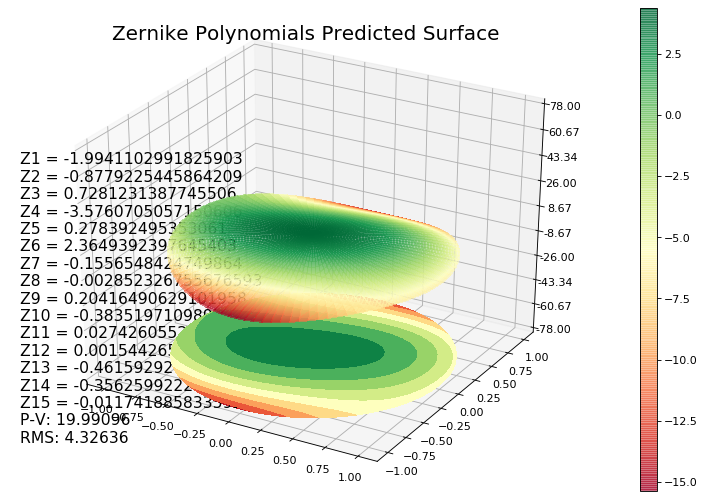

Z1 =  0.4873047 Z00 Piston or Bias
Z2 =  -0.84992003 Z11 x Tilt
Z3 =  0.56173605 Z11 y Tilt
Z4 =  -3.5442116 Z20 Defocus
Z5 =  0.2689529 Z22 Primary Astigmatism at 45
Z6 =  2.3399704 Z22 Primary Astigmatism at 0
Z7 =  -0.17867745 Z31 Primary y Coma
Z8 =  -0.021913653 Z31 Primary x Coma
Z9 =  0.22647594 Z33 y Trefoil
Z10 =  -0.37255052 Z33 x Trefoil
Z11 =  0.03758662 Z40 Primary Spherical
Z12 =  -0.016568 Z42 Secondary Astigmatism at 0
Z13 =  -0.4551072 Z42 Secondary Astigmatism at 45
Z14 =  -0.36101592 Z44 x Tetrafoil
Z15 =  -0.017285509 Z44 y Tetrafoil


<Figure size 432x288 with 0 Axes>

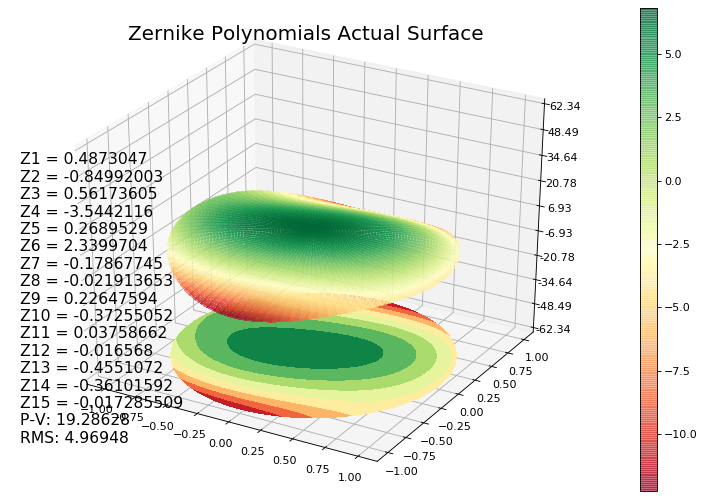

In [12]:
train_input = plot_func_appx(6,parent_dir,z_gen_blocknoise,savefig=False,name_append='_BlockNoise')